# Dionysus Tutorial

Author: YinTaiChen

Reference 1: http://www.mrzv.org/software/dionysus/_downloads/dionysus-slides.pdf

Reference 2: http://mrzv.org/software/dionysus2/tutorial/index.html

Reference 3: https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

Reference 4: https://matplotlib.org/examples/pylab_examples/tripcolor_demo.html

Reference 5: https://morvanzhou.github.io/tutorials/data-manipulation/plt/

# Installation

Installing via pip:

In [ ]:
sudo pip3 install --verbose dionysus

or installing from the conda-forge channel can be achieved by adding conda-forge to your channels with:

In [ ]:
conda config --add channels conda-forge

Once the conda-forge channel has been enabled, dionysus can be installed with:

In [ ]:
conda install dionysus

# Let's import everything

In [3]:
import dionysus as d
import numpy as np
import matplotlib.pyplot as plt

# Persistent Homology

A way to detect prominent topological features in point clouds.

# Simplices

A simplex is simply a list of vertices. It’s represented by the Simplex class:

In [9]:
s = d.Simplex([0,1,2])
print("Dimensions: ", s.dimension())

Dimensions:  2


We can iterate over the vertices of the simplex.

In [8]:
print ("Vertices: ")
for v in s:
    print(v)

Vertices: 
0
1
2


Or over the boundary:

In [11]:
print ("Boundary: ")
for sb in s.boundary():
    print(sb)

Boundary: 
<1,2> 0
<0,2> 0
<0,1> 0


Simplices can store optional data, and the 0 reported after each boundary edge is the default value of the data:

In [12]:
s.data = 5
print(s)

<0,1,2> 5


We can use closure() to generate all faces of a set of simplices. For example, an 8-sphere is the 8-dimensional skeleton of the closure of the 9-simplex.

In [16]:
simplex9 = d.Simplex([0,1,2,3,4,5,6,7,8,9])
print("simplex9: ", simplex9)

sphere8  = d.closure([simplex9], 8)
print("length of sphere8:", len(sphere8))

simplex9:  <0,1,2,3,4,5,6,7,8,9> 0
length of sphere8: 1022


# Complexes

Complex is a collection of Simplices:

In [20]:
complex = [d.Simplex(vertices) for vertices in
[[0], [1], [2], [3], [4], [5],
[0,1], [0,2], [1,2], [0,1,2],
[1,3], [2,4], [3,4]]]

print(complex)

[<0> 0, <1> 0, <2> 0, <3> 0, <4> 0, <5> 0, <0,1> 0, <0,2> 0, <1,2> 0, <0,1,2> 0, <1,3> 0, <2,4> 0, <3,4> 0]


# Filtration

A filtration is a nested sequence of simplicial complexes, K1⊆K2⊆…⊆Kn. 

Without loss of generality, we can assume that two consecutive complexes in the filtration differ by a single simplex, so we can think of a filtration as a sequence of simplices.

![title](http://mrzv.org/software/dionysus2/_images/filtration.png)

In Dionysus, a filtration is represented by a special class, Filtration, that supports both iterating over the simplices and looking up an index given a simplex.

A filtration can be sort()ed. By default this orders simplices by their data, breaking ties by dimension, and then lexicographically.

In [24]:
simplices = [([2], 4), ([1,2], 5), ([0,2], 6),
              ([0], 1),   ([1], 2), ([0,1], 3)]

f = d.Filtration()

for vertices, time in simplices:
    f.append(d.Simplex(vertices, time))
    
f.sort()

for s in f:
    print(s)

<0> 1
<1> 2
<0,1> 3
<2> 4
<1,2> 5
<0,2> 6


We can lookup the index of a given simplex. (Indexing starts from 0.)

In [25]:
print(f.index(d.Simplex([1,2])))

4


# Vietoris–Rips Complexes

![title](http://mrzv.org/software/dionysus2/_images/vietoris-rips.png)

Dionysus can compute Vietoris–Rips complexes. Given a point set P, a Vietoris–Rips complex consists of all those simplices whose vertices are at pairwise distance no more than r, VRr(P)={σ⊆P∣∀ u,v∈σ,‖u−v‖≤r}.

fill_rips() computes Vietoris–Rips filtrations (up to a specified skeleton dimension and distance r).

It accepts points as NumPy arrays, following the standard convention that rows of a 2-dimensional array are interpreted as points in Euclidean space:

首先，透過 numpy.random.random 創造 100 個 2D 的點

In [24]:
points = np.random.random((100,2))

設定 Filtration 的參數

In [ ]:
DIMENSION = 2
ALPHA = 0.1

建立 Filtration

In [26]:
f = d.fill_rips(points, DIMENSION, ALPHA)
print(f)

Filtration with 383 simplices


觀察一下 Filtration 的內容

In [27]:
for s in f:
    print(s)

<0> 0
<1> 0
<2> 0
<3> 0
<4> 0
<5> 0
<6> 0
<7> 0
<8> 0
<9> 0
<10> 0
<11> 0
<12> 0
<13> 0
<14> 0
<15> 0
<16> 0
<17> 0
<18> 0
<19> 0
<20> 0
<21> 0
<22> 0
<23> 0
<24> 0
<25> 0
<26> 0
<27> 0
<28> 0
<29> 0
<30> 0
<31> 0
<32> 0
<33> 0
<34> 0
<35> 0
<36> 0
<37> 0
<38> 0
<39> 0
<40> 0
<41> 0
<42> 0
<43> 0
<44> 0
<45> 0
<46> 0
<47> 0
<48> 0
<49> 0
<50> 0
<51> 0
<52> 0
<53> 0
<54> 0
<55> 0
<56> 0
<57> 0
<58> 0
<59> 0
<60> 0
<61> 0
<62> 0
<63> 0
<64> 0
<65> 0
<66> 0
<67> 0
<68> 0
<69> 0
<70> 0
<71> 0
<72> 0
<73> 0
<74> 0
<75> 0
<76> 0
<77> 0
<78> 0
<79> 0
<80> 0
<81> 0
<82> 0
<83> 0
<84> 0
<85> 0
<86> 0
<87> 0
<88> 0
<89> 0
<90> 0
<91> 0
<92> 0
<93> 0
<94> 0
<95> 0
<96> 0
<97> 0
<98> 0
<99> 0
<8,64> 9.40044e-06
<34,78> 7.07675e-05
<55,77> 0.000138592
<37,58> 0.000196144
<61,79> 0.000252925
<25,40> 0.000259714
<80,96> 0.000294661
<3,24> 0.000384117
<31,41> 0.000530716
<4,12> 0.000538792
<13,79> 0.000664549
<46,69> 0.000671689
<45,60> 0.000741655
<42,66> 0.000757086
<55,68> 0.000772021
<49,98> 0.000

Filtration 中的 < n > ，可用於 points 的 indexing 

In [28]:
for s in f:
    if len(s) == 1:
        print(points[s[0]], s.data)
    elif len(s) == 2:
        print(points[s[0]], points[s[1]], s.data)
    elif len(s) == 3:
        print(points[s[0]], points[s[1]], points[s[2]], s.data)

[ 0.31941512  0.85135215] 0.0
[ 0.32456992  0.12891946] 0.0
[ 0.24419429  0.02626786] 0.0
[ 0.44252932  0.93432029] 0.0
[ 0.52199332  0.20768763] 0.0
[ 0.38519147  0.27948212] 0.0
[ 0.40467036  0.77564496] 0.0
[ 0.87125823  0.41905365] 0.0
[ 0.7066073   0.75153242] 0.0
[ 0.76269754  0.46027369] 0.0
[ 0.50085882  0.42894524] 0.0
[ 0.5680024   0.54650433] 0.0
[ 0.52298608  0.18449696] 0.0
[ 0.93157259  0.86988582] 0.0
[ 0.89787982  0.86142986] 0.0
[ 0.12602375  0.17422114] 0.0
[ 0.04920029  0.1576199 ] 0.0
[ 0.1466883  0.2770156] 0.0
[ 0.50499496  0.06288773] 0.0
[ 0.89127899  0.3810063 ] 0.0
[ 0.2557593   0.83367116] 0.0
[ 0.68375595  0.48221833] 0.0
[ 0.546604    0.90451941] 0.0
[ 0.60270702  0.09363973] 0.0
[ 0.44671089  0.95346792] 0.0
[ 0.27061062  0.74121403] 0.0
[ 0.18104036  0.91844132] 0.0
[ 0.93854083  0.26190065] 0.0
[ 0.26718745  0.66145182] 0.0
[ 0.80241469  0.08714713] 0.0
[ 0.00175454  0.27350224] 0.0
[ 0.24777656  0.90266736] 0.0
[ 0.88008566  0.26507395] 0.0
[ 0.37971727

# VR Complex Visualization

產生隨機資料點、設定參數與建立 Filtration

In [4]:
points = np.random.random((100,2))

DIMENSION = 2
ALPHA = 0.2

f = d.fill_rips(points, DIMENSION, ALPHA)

0-simplices

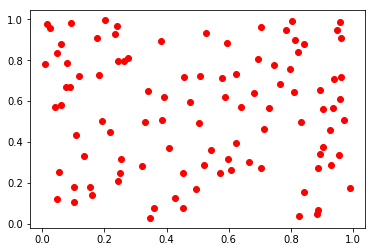

In [5]:
for p in points:
    plt.plot([p[0]], [p[1]], 'ro')
plt.show()

釋出圖片的記憶體空間：

In [6]:
plt.close()

0-simpliexs and 1-simplices

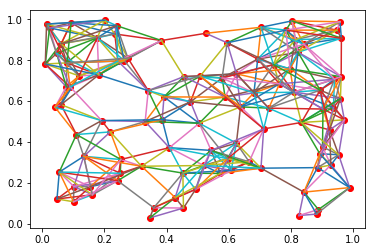

In [7]:
for s in f:
    if len(s) == 1:
        x = [points[s[0]][0]]
        y = [points[s[0]][1]]
        plt.plot(x, y, 'ro')
    elif len(s) == 2:
        x = [points[s[0]][0], points[s[1]][0]]
        y = [points[s[0]][1], points[s[1]][1]]
        plt.plot(x, y, '-')
plt.show()

釋出圖片的記憶體空間：

In [8]:
plt.close()

0-simpliexs, 1-simplices and 2-simplices

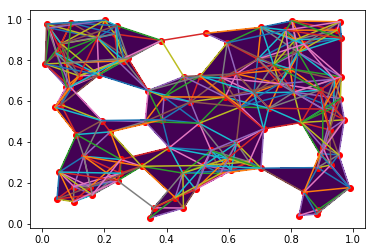

In [9]:
for s in f:
    if len(s) == 1:
        x = [points[s[0]][0]]
        y = [points[s[0]][1]]
        plt.plot(x, y, 'ro')
    elif len(s) == 2:
        x = [points[s[0]][0], points[s[1]][0]]
        y = [points[s[0]][1], points[s[1]][1]]
        plt.plot(x, y, '-')
    elif len(s) == 3:
        x = [points[s[0]][0], points[s[1]][0], points[s[2]][0]]
        y = [points[s[0]][1], points[s[1]][1], points[s[2]][1]]
        z = np.sin(x) + np.cos(y)
        plt.tripcolor(x, y, z)
plt.show()

釋出圖片的記憶體空間：

In [8]:
plt.close()

# Exercise

To be continued......